# The Great Analyzer

##### This notebook is designed to be a starting point in training, evaluating, and tuning algorithms for a binary classification machine learning problem.

### Import Libraries
It is necessary to import the basic libraries for cleaning and munging to start off with. Other import statements will come with each algorithm as it is initialized.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background') # this setting is for my jupyter environment specifically.

## Data Preparation

This stage will not be automated here. What follows is an example data prep on a data set from a machine learning repository. Data preparation for an actual problem will likely involve a greater number of transformations and thus, is beyond the scope of this notebook.

Four objects should be created in this stage that can pass to the algorithm building stage:
* X_train: an *m* x *k* array of *k* non-covariant features where *m* is 60-80% of *n* (number of data points in original dataset)
* X_test: an *l* x *k* array of *k* non-covariant features where *l* is 20-40% of *n*
* y_train: an *m* x 1 vector of integer-encoded class labels
* y_test: an *l* x 1 vector of integer-encoded class labels

### Import the data

In [2]:
df_adults = pd.read_csv(r'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

df_adults.columns = ['Age', 'Work Class', 'Census Sampling Weight', 'Education',
                     'Education-numeric', 'Marital Status', 'Occupation', 'Relationship',
                     'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per week',
                     'Native Country', '50k']
df_adults.head(10)

,Age,Work Class,Census Sampling Weight,Education,Education-numeric,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native Country,50k
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


We'll use the Education-numeric field over Education because it assigns an intuitive weight to each education level already.

In [3]:
del df_adults['Education']

In [4]:
df_adults.dtypes

Age                        int64
Work Class                object
Census Sampling Weight     int64
Education-numeric          int64
Marital Status            object
Occupation                object
Relationship              object
Race                      object
Sex                       object
Capital Gain               int64
Capital Loss               int64
Hours per week             int64
Native Country            object
50k                       object
dtype: object

We also need to encode our class label field.

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_adults['50k'] = le.fit_transform(df_adults['50k'].values.ravel())
df_adults.head(10)

,Age,Work Class,Census Sampling Weight,Education-numeric,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native Country,50k
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
5,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
6,52,Self-emp-not-inc,209642,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
7,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
8,42,Private,159449,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
9,37,Private,280464,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1


In [6]:
le.classes_

array([' <=50K', ' >50K'], dtype=object)

In [7]:
df_adults.isnull().values.any()

False

In [8]:
df_adults.loc[df_adults['Education-numeric']==0].values.any()

False

Let's see how unbalanced our data set is.

In [9]:
num_0 = len(df_adults.loc[df_adults['50k']==0])
num_1 = len(df_adults.loc[df_adults['50k']==1])

print('People making less than 50k account for {0:0.2f}% of the dataset'.format((num_0/len(df_adults['50k'].values))*100))
print('People making more than 50k account for {0:0.2f}% of the dataset'.format((num_1/len(df_adults['50k'].values))*100))

People making less than 50k account for 75.92% of the dataset
People making more than 50k account for 24.08% of the dataset


The data isn't terribly imbalanced but we may find more success with setting the hyperparameters for regressors to be balanced.

In [10]:
df_adults.head()

,Age,Work Class,Census Sampling Weight,Education-numeric,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Native Country,50k
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [11]:
df_adults = pd.get_dummies(df_adults)

In [12]:
df_adults.columns

Index(['Age', 'Census Sampling Weight', 'Education-numeric', 'Capital Gain',
       'Capital Loss', 'Hours per week', '50k', 'Work Class_ ?',
       'Work Class_ Federal-gov', 'Work Class_ Local-gov',
       'Work Class_ Never-worked', 'Work Class_ Private',
       'Work Class_ Self-emp-inc', 'Work Class_ Self-emp-not-inc',
       'Work Class_ State-gov', 'Work Class_ Without-pay',
       'Marital Status_ Divorced', 'Marital Status_ Married-AF-spouse',
       'Marital Status_ Married-civ-spouse',
       'Marital Status_ Married-spouse-absent',
       'Marital Status_ Never-married', 'Marital Status_ Separated',
       'Marital Status_ Widowed', 'Occupation_ ?', 'Occupation_ Adm-clerical',
       'Occupation_ Armed-Forces', 'Occupation_ Craft-repair',
       'Occupation_ Exec-managerial', 'Occupation_ Farming-fishing',
       'Occupation_ Handlers-cleaners', 'Occupation_ Machine-op-inspct',
       'Occupation_ Other-service', 'Occupation_ Priv-house-serv',
       'Occupation_ Prof-speci

In [13]:
df_adults.shape

(32560, 93)

In [14]:
def plot_corr (df, size=12) :
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input:
        df: pandas Dataframe
        size: vertical and horizontal style of the plot
        
        Displays:
            matrix of correlation between columns. purple-blue-lightgreen-yellow => less to more correlated
                                                    0 --------------------> 1
                                            Expect a darkred line running from top left to bottom right
    """
    
    corr = df.corr()       # data frame correlation function
    
    plt.style.use('dark_background')
    
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)      # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    
    plt.show()

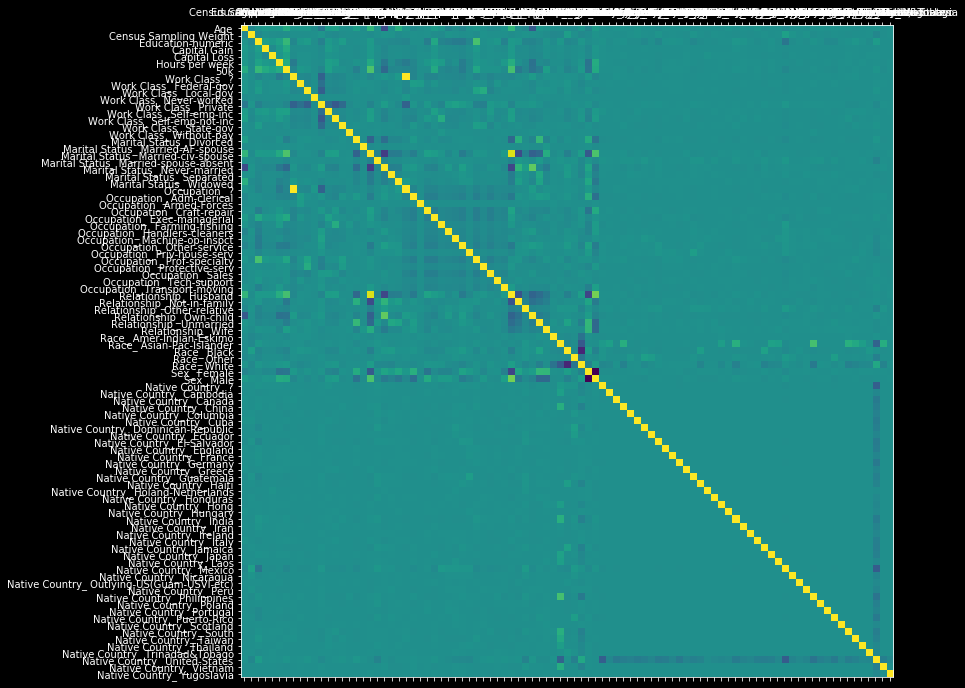

In [15]:
plot_corr(df_adults)

In [16]:
corr_mat = df_adults.corr()
test = corr_mat.where(corr_mat['Relationship_ Husband'] >= .8).dropna()
test.index.values

array(['Marital Status_ Married-civ-spouse', 'Relationship_ Husband'], dtype=object)

In [17]:
def redundancy_finder(df, cutoff=0.8):
    correlated_vars = []
    corr_mat = df.corr()
    for column in corr_mat.columns:
        test = corr_mat.where(corr_mat[column] >= .8).dropna()
        var1 = test.index.tolist()
        var1.remove(column)
        if var1 != []:
            values = [corr_mat[column][var1] for var in var1]
            col = [column for i in range(len(var1))]
            correlated_vars.append(zip(col, var1, values))
    return correlated_vars

In [18]:
for zip_obj in redundancy_finder(df_adults):
    print(list(zip_obj))

[('Work Class_ ?', 'Occupation_ ?', Occupation_ ?    0.997985
Name: Work Class_ ?, dtype: float64)]
[('Marital Status_ Married-civ-spouse', 'Relationship_ Husband', Relationship_ Husband    0.893208
Name: Marital Status_ Married-civ-spouse, dtype: float64)]
[('Occupation_ ?', 'Work Class_ ?', Work Class_ ?    0.997985
Name: Occupation_ ?, dtype: float64)]
[('Relationship_ Husband', 'Marital Status_ Married-civ-spouse', Marital Status_ Married-civ-spouse    0.893208
Name: Relationship_ Husband, dtype: float64)]


In [19]:
del df_adults['Occupation_ ?']
del df_adults['Relationship_ Husband']

In [20]:
df_adults.head()

,Age,Census Sampling Weight,Education-numeric,Capital Gain,Capital Loss,Hours per week,50k,Work Class_ ?,Work Class_ Federal-gov,Work Class_ Local-gov,...,Native Country_ Portugal,Native Country_ Puerto-Rico,Native Country_ Scotland,Native Country_ South,Native Country_ Taiwan,Native Country_ Thailand,Native Country_ Trinadad&Tobago,Native Country_ United-States,Native Country_ Vietnam,Native Country_ Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
names = list(df_adults.columns.values)
names.remove('50k')

X = df_adults[names].values
y = df_adults['50k'].values

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

Our data has been prepared. Now we can lay out a framework for algorithm testing.

## Algorithm Testing

I'm going to go through the more common algorithms here. This can be expanded to implement whatever you want.

The basic idea is to do cross-validation, grid search, plot roc curves, etc. all within a single instance. Thus, we get a single comprised view of how the data is doing. 

### Pipelines

We'll define all of our algorithm pipelines here.

In [23]:
from sklearn.pipeline import Pipeline

#### Logistic Regression

In [24]:
names = []
models = []
grids = []

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
        penalty='l2',
        random_state=777,
        max_iter=10000,
        fit_intercept=True,
        solver='newton-cg',
        class_weight='balanced',
        tol=.1)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

lr_pipe = Pipeline([('scl', sc),
                       ('clf', lr)])

lr_grid = {'clf__C' : list(np.power(10.0, np.arange(-5, 5)))}

names.append('Logistic Regression')
models.append(lr_pipe)
grids.append(lr_grid)

#### Support Vector Classification

In [25]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold

svc = LinearSVC(
    tol=0.1,
    max_iter=10000,
    penalty='l2',
    dual=False)

svc_pipe = Pipeline([('scl', sc),
                     ('clf', svc),])

svc_grid = {'clf__C' : list(np.power(10.0, np.arange(-5, 5)))}

names.append('Support Vector Classifier')
models.append(svc_pipe)
grids.append(svc_grid)

#### Naive Bayes Classifier

In [26]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

names.append('Naive Bayes Classifier')
models.append(gnb)
grids.append(None)

#### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
            n_jobs=-1,
            random_state=42,
            max_depth=None,
            n_estimators=1000)

forest_grid = {'max_features' : ['sqrt','log2',None],
               'criterion' : ['gini', 'entropy']}

names.append('Random Forest')
models.append(forest)
grids.append(forest_grid)

### Grid Search

Using all of our classifiers, we can implement a grid search to find the most optimal versions.

In [28]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tests = zip(names, models, grids)

for name, model, grid in tests:
    if grid != None:
        gs = GridSearchCV(
            estimator=model,
            cv=10,
            scoring='roc_auc',
            param_grid=grid,
            pre_dispatch=8,
            n_jobs=-1)
    
        gs.fit(X_train, y_train.ravel())
    
        print('{0}: Best Parameters - {1}, Best ROC_AUC - {2}'.format(name,gs.best_params_,gs.best_score_))
    
    else:
        scores = cross_val_score(estimator=model,
                                 X=X_train,
                                 y=y_train,
                                 cv=10,
                                 n_jobs=-1,
                                 scoring='roc_auc')
        
        print('{0}: Mean ROC_AUC - {1} +/- {2}'.format(name,np.mean(scores),np.std(scores)))

C:\Users\Tyler Hughes\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Logistic Regression: Best Parameters - {'clf__C': 0.10000000000000001}, Best ROC_AUC - 0.9061510915714805


C:\Users\Tyler Hughes\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Support Vector Classifier: Best Parameters - {'clf__C': 100.0}, Best ROC_AUC - 0.9059234867989177
Naive Bayes Classifier: Mean ROC_AUC - 0.8301854637950958 +/- 0.009860879706590933
Random Forest: Best Parameters - {'max_features': None, 'criterion': 'entropy'}, Best ROC_AUC - 0.9085075017836884


In [33]:
from sklearn.metrics import accuracy_score

lr_optimal = LogisticRegression(
                C=0.1,
                class_weight='balanced', 
                dual=False,
                fit_intercept=True, 
                intercept_scaling=1, 
                max_iter=10000,
                multi_class='ovr', 
                n_jobs=1, 
                penalty='l2', 
                random_state=777,
                solver='newton-cg', 
                tol=0.1, 
                verbose=0, 
                warm_start=False)

lr_opt_pipe = Pipeline([('scl', sc),
                        ('clf', lr_optimal)])

lr_opt_pipe.fit(X_train, y_train)

y_pred = lr_opt_pipe.predict(X_test)

print('Logistic Regression Accuracy: {0:.2f}'.format(accuracy_score(y_test, y_pred)))

C:\Users\Tyler Hughes\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Logistic Regression Accuracy: 0.81


In [36]:
y_pred = gs.best_estimator_.predict(X_test)

In [37]:
print('Accuracy: {0:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.86


In [38]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)